<a href="https://colab.research.google.com/github/widyadaridhyp/Airline-Customer-Value-Analysis/blob/main/Identifying_Airline_Customer_Segments_to_Optimize_Business_Strategies_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

1. MEMBER_NO-b : ID Member
2. FFP_DATE : Frequent Flyer Program Join Date
3. FIRST_FLIGHT_DATE : Tanggal penerbangan pertama
4. GENDER : Jenis Kelamin
5. FFP_TIER : Tier dari Frequent Flyer Program
6. WORK_CITY : Kota Asal
7. WORK_PROVINCE : Provinsi Asal
8. WORK_COUNTRY : Negara Asal
9. AGE : Umur Customer
10. LOAD_TIME : Tanggal data diambil
11. FLIGHT_COUNT : Jumlah penerbangan Customer
12. BP_SUM : Rencana Perjalanan (Description)
13. SUM_YR_1 : Total credit/point di tahun pertama
14. SUM_YR_2 : Total credit/point di tahun kedua
15. SEG_KM_SUM : Total jarak (km) penerbangan yang sudah dilakukan
16. LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
17. LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
18. AVG_INTERVAL : Rata-rata jarak waktu
19. MAX_INTERVAL : Maksimal jarak waktu
20. EXCHANGE_COUNT : Jumlah penukaran
21. avg_discount : Rata-rata discount yang didapat customer
22. Points_Sum : Jumlah poin yang didapat customer
23. Point_NotFlight : Poin yang tidak digunakan oleh members

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('flight.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['member_no', 'ffp_date', 'first_flight_date', 'gender', 'ffp_tier',
       'work_city', 'work_province', 'work_country', 'age', 'load_time',
       'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_flight_date', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [ ]:
df.ffp_date = pd.to_datetime(df.ffp_date)
df.first_flight_date = pd.to_datetime(df.first_flight_date)
df.last_flight_date = pd.to_datetime(df.last_flight_date, errors='coerce')
df.load_time = pd.to_datetime(df.load_time)


In [ ]:
df.describe()

,member_no,ffp_date,first_flight_date,ffp_tier,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988,62988,62988.000000,62568.000000,62988,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62567,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,2010-03-06 23:58:48.672128,2010-09-01 17:59:44.911411968,4.102162,42.476346,2014-03-30 23:59:59.999999744,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,2013-10-06 15:32:03.103233280,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
min,1.000000,2004-11-01 00:00:00,1905-12-31 00:00:00,4.000000,6.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,2008-04-12 00:00:00,2008-12-14 18:00:00,4.000000,35.000000,2014-03-31 00:00:00,3.000000,2518.000000,1003.000000,780.000000,4747.000000,2013-07-07 00:00:00,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,2010-10-08 00:00:00,2011-04-23 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,2013-12-14 00:00:00,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,2012-03-29 00:00:00,2012-07-26 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,2014-03-03 00:00:00,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,2013-03-31 00:00:00,2015-05-30 00:00:00,6.000000,110.000000,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000
std,18183.213715,NaN,NaN,0.373856,9.885915,NaN,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,NaN,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164


# Handling Missing Values

In [ ]:
df.isnull().sum()

,0
member_no,0
ffp_date,0
first_flight_date,0
gender,3
ffp_tier,0
work_city,2269
work_province,3248
work_country,26
age,420
load_time,0


In [ ]:
df.isnull().mean()

,0
member_no,0.000000
ffp_date,0.000000
first_flight_date,0.000000
gender,0.000048
ffp_tier,0.000000
work_city,0.036023
work_province,0.051565
work_country,0.000413
age,0.006668
load_time,0.000000


$\therefore$ Karena persentase missing valuesnya dibawah 10% semua, maka akan dihilangkan datanya

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().mean()

,0
member_no,0.0
ffp_date,0.0
first_flight_date,0.0
gender,0.0
ffp_tier,0.0
work_city,0.0
work_province,0.0
work_country,0.0
age,0.0
load_time,0.0


In [ ]:
df.shape

(57860, 23)

In [ ]:
df.duplicated().sum()

np.int64(0)

# Handling Multikolinearitas

In [ ]:
num = df.select_dtypes(include='number').columns
cat = df.select_dtypes(exclude='number').columns

In [ ]:
num = num.drop('member_no')

<Axes: >

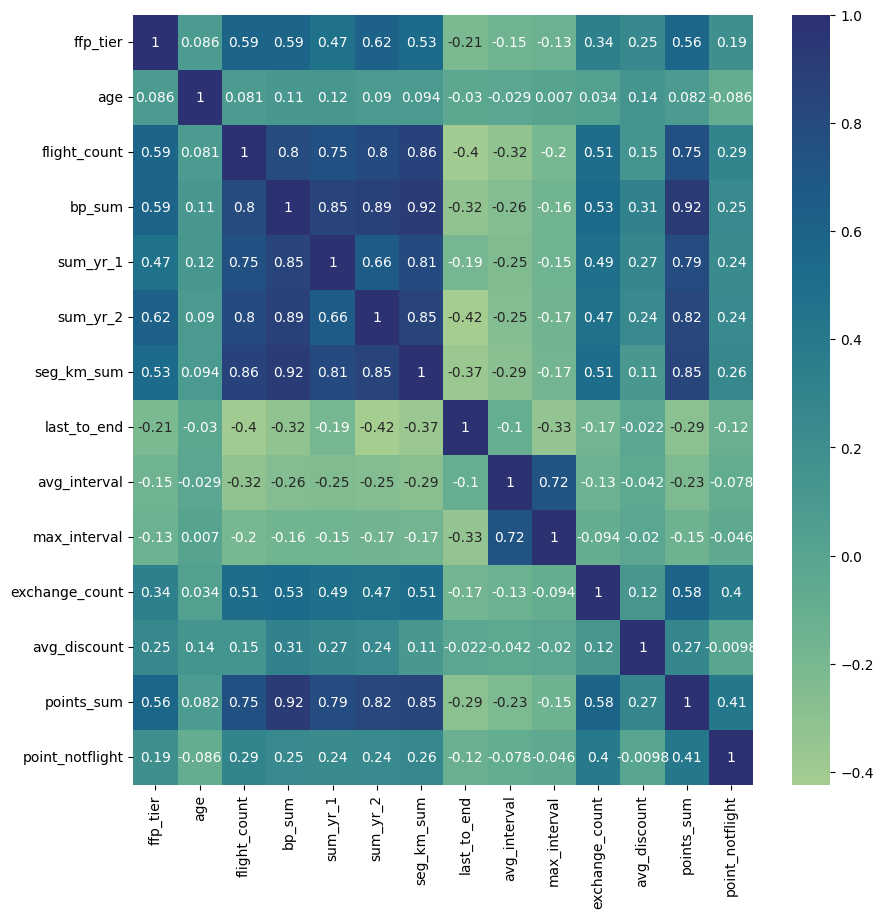

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(), annot=True, cmap='crest')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [ ]:
X = add_constant(df[num])
vif_data = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,ffp_tier,1.809830
2,age,1.044728
3,flight_count,5.630996
4,bp_sum,24.994773
5,sum_yr_1,5.321829
6,sum_yr_2,7.396886
7,seg_km_sum,12.035134
8,last_to_end,1.748898
9,avg_interval,2.322017
10,max_interval,2.590909


`bp_sum` dan `seg_km_sum` akan didrop

In [ ]:
num = num.drop(['bp_sum','seg_km_sum'])

In [ ]:
X = add_constant(df[num])
vif_data = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,ffp_tier,1.766929
2,age,1.042197
3,flight_count,4.591853
4,sum_yr_1,3.579530
5,sum_yr_2,5.006131
6,last_to_end,1.744366
7,avg_interval,2.310912
8,max_interval,2.587655
9,exchange_count,1.615868
10,avg_discount,1.178587


<Axes: >

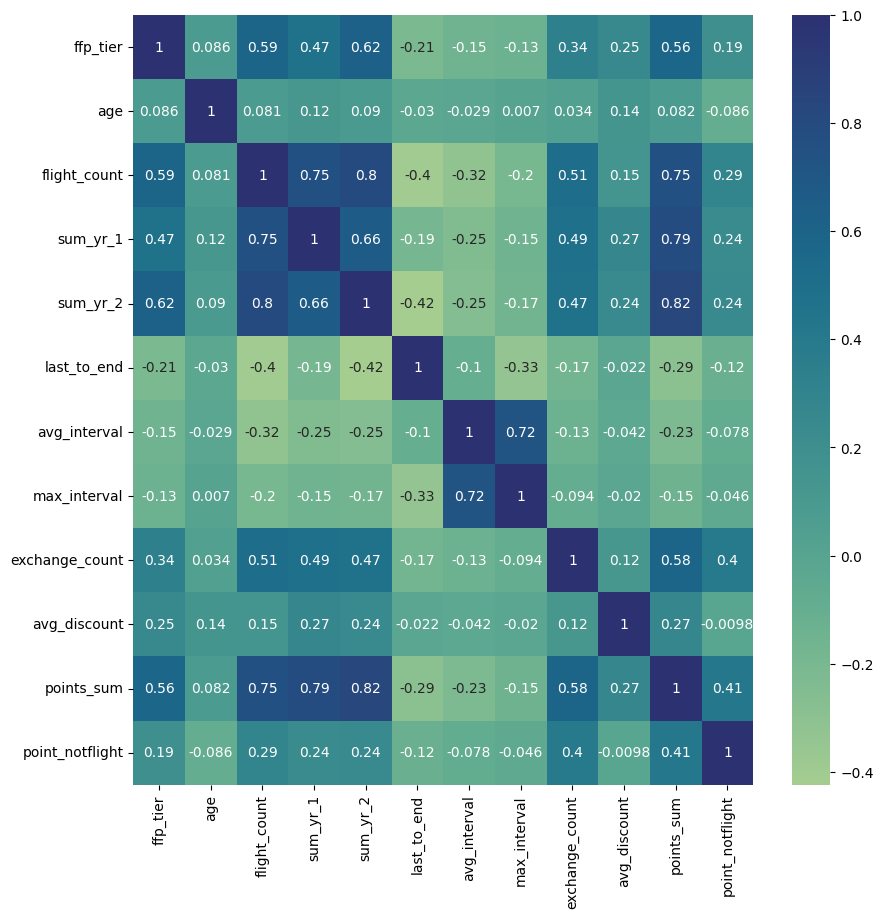

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(), annot=True, cmap='crest')

`sum_yr_2` dan `points_sum` cenderung moderat tapi akan dikeep

# Feature Engineering

In [ ]:
df_cleaned = pd.concat([df[num], df[cat]], axis=1)
df_cleaned.columns

Index(['ffp_tier', 'age', 'flight_count', 'sum_yr_1', 'sum_yr_2',
       'last_to_end', 'avg_interval', 'max_interval', 'exchange_count',
       'avg_discount', 'points_sum', 'point_notflight', 'ffp_date',
       'first_flight_date', 'gender', 'work_city', 'work_province',
       'work_country', 'load_time', 'last_flight_date'],
      dtype='object')

In [ ]:
df_cleaned['recency'] = df_cleaned.load_time - df_cleaned.last_flight_date
df_cleaned['recency'] = df_cleaned.recency.dt.days

df_cleaned['frequency'] = abs(df.flight_count/((df.load_time - df.first_flight_date).dt.days/365))
df_cleaned['exchange_ratio'] = df_cleaned.exchange_count/df_cleaned.flight_count

df_cleaned['monetary'] = df_cleaned.sum_yr_1 + df_cleaned.sum_yr_2

df_cleaned['interval_ratio'] = df_cleaned.max_interval/df_cleaned.avg_interval #Mendekati 1 sangat rutin, tetapi > 1 polanya tidak teratur

In [ ]:
num = df_cleaned.select_dtypes(include='number').columns
cat = df_cleaned.select_dtypes(exclude='number').columns

<Axes: >

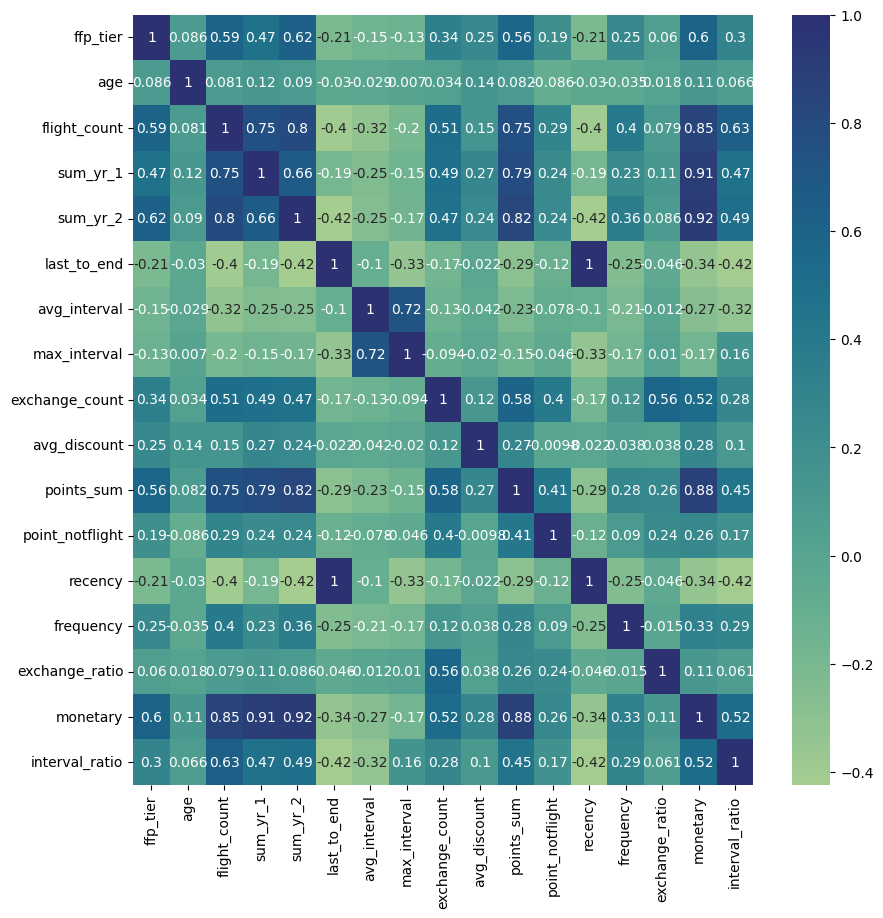

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned[num].corr(), annot=True, cmap='crest')

In [ ]:
df_cleaned.fillna(0, inplace=True)

In [ ]:
num = num.drop(['flight_count','sum_yr_1','sum_yr_2','avg_interval','max_interval','exchange_count','points_sum',])

# Exploratory Data Analysis

In [ ]:
df[['gender','work_city','work_province','work_country']].describe()

,gender,work_city,work_province,work_country
count,57860,57860,57860,57860
unique,2,2935,1123,105
top,Male,guangzhou,guangdong,CN
freq,44127,9223,17215,54572


Akan dilakukan one hot encoding untuk `gender `(binary), sedangkan `work_city`, `work_province`, dan `work_country` label encoding

In [ ]:
df_cleaned[num].describe()

,ffp_tier,age,last_to_end,avg_discount,point_notflight,recency,frequency,exchange_ratio,monetary,interval_ratio
count,57860.000000,57860.000000,57860.00000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000
mean,4.104666,42.233253,172.20598,0.720626,2.819703,170.474888,4.601214,0.019137,11043.096613,3.131427
std,0.378206,9.763364,180.80718,0.183942,7.497873,180.570850,8.299329,0.086201,15350.753091,1.888196
min,4.000000,6.000000,1.00000,0.000000,0.000000,0.000000,0.073855,0.000000,0.000000,0.000000
25%,4.000000,35.000000,28.00000,0.612019,0.000000,27.000000,1.320072,0.000000,2770.000000,1.829660
50%,4.000000,41.000000,105.00000,0.711429,0.000000,103.000000,2.723881,0.000000,5961.000000,2.826087
75%,4.000000,48.000000,259.25000,0.808333,1.000000,257.250000,5.547112,0.000000,13100.000000,4.072794
max,6.000000,110.000000,731.00000,1.500000,140.000000,729.000000,730.000000,7.333333,473748.000000,24.273654


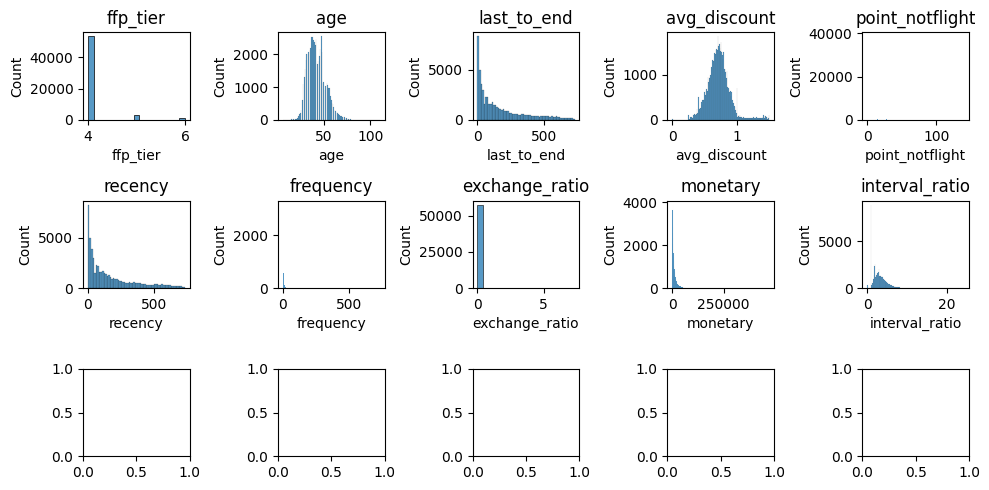

In [ ]:
fig, axes = plt.subplots(3,5)
fig.set_size_inches(10,5)

for col, ax in zip(num, axes.flatten()):
    sns.histplot(df_cleaned[col], ax=ax)
    ax.set_title(col)
    plt.tight_layout()

plt.show()

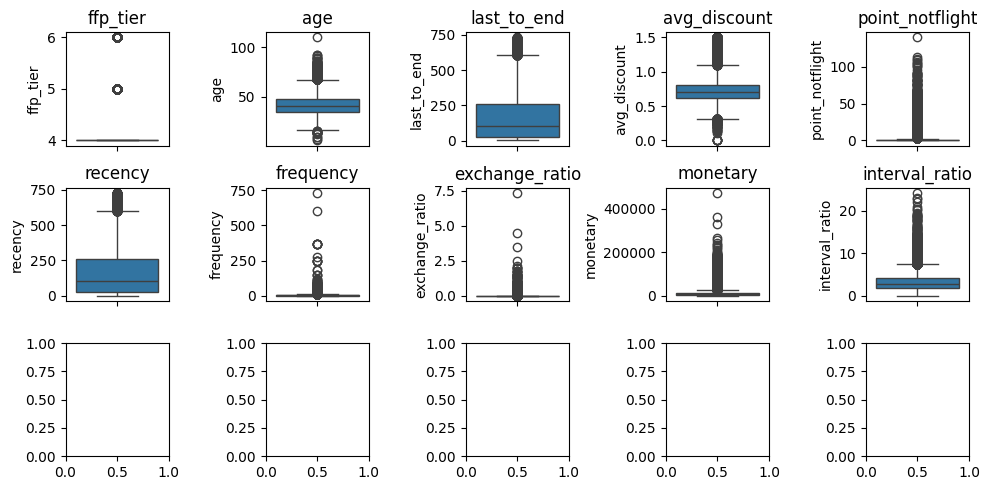

In [ ]:
fig, axes = plt.subplots(3,5)
fig.set_size_inches(10,5)

for col, ax in zip(num, axes.flatten()):
    sns.boxplot(df_cleaned[col], ax=ax)
    ax.set_title(col)
    plt.tight_layout()

plt.show()

$\therefore$ Karena outliernya banyakdan data tidak berdistrbusi normal, kemungkinan akan digunakan RobustScaler

<Axes: >

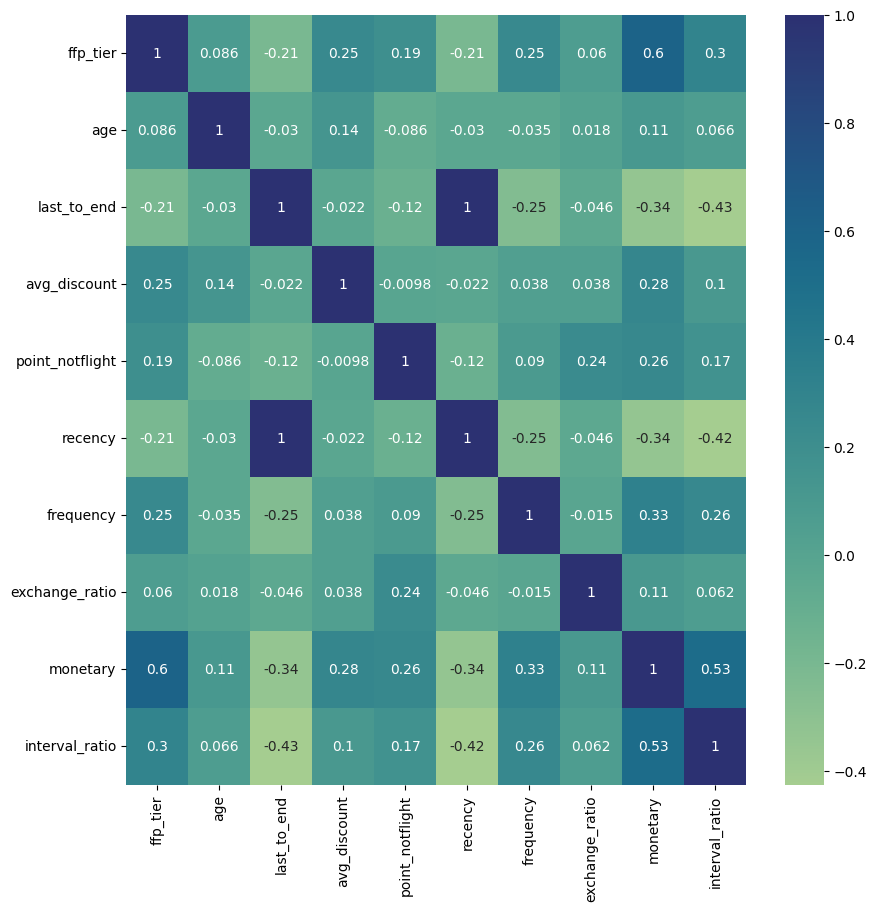

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned[num].corr(), annot=True, cmap='crest')

# Feature Encoding

In [ ]:
cat_le =['work_city','work_province','work_country']

In [ ]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [ ]:
le = LabelEncoder()
df_cleaned[cat_le] = df_cleaned[cat_le].apply(le.fit_transform)

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned,
                            columns=['gender'],
                            prefix=['gender'],
                            drop_first=True)

In [ ]:
df_cleaned.columns

Index(['ffp_tier', 'age', 'flight_count', 'sum_yr_1', 'sum_yr_2',
       'last_to_end', 'avg_interval', 'max_interval', 'exchange_count',
       'avg_discount', 'points_sum', 'point_notflight', 'ffp_date',
       'first_flight_date', 'work_city', 'work_province', 'work_country',
       'load_time', 'last_flight_date', 'recency', 'frequency',
       'exchange_ratio', 'monetary', 'interval_ratio', 'gender_Male'],
      dtype='object')

In [ ]:
feature = pd.concat([df_cleaned[num], df_cleaned[cat_le], df_cleaned[['gender_Male']]], axis=1)

In [ ]:
feature['gender_Male']=feature['gender_Male'].map({True:1, False:0})

In [ ]:
feature.head()

,ffp_tier,age,last_to_end,avg_discount,point_notflight,recency,frequency,exchange_ratio,monetary,interval_ratio,work_city,work_province,work_country,gender_Male
0,6,31.0,1,0.961639,50,0,39.859594,0.161905,473748.0,5.167582,5,810,21,1
2,6,40.0,11,1.254676,26,10,20.488565,0.148148,328600.0,3.397183,5,810,21,1
3,5,64.0,97,1.090870,12,95,4.103128,0.478261,241850.0,2.619902,763,96,92,1
4,6,48.0,5,0.970658,39,4,30.635008,0.177632,255262.0,9.816044,1847,890,21,1
5,6,64.0,79,0.967692,15,77,20.425791,0.108696,189310.0,7.382215,1820,872,21,1


# Transformation

In [ ]:
feature[num] = RobustScaler().fit_transform(feature[num])

# Evaluation Cluster

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Intertia / WSS')

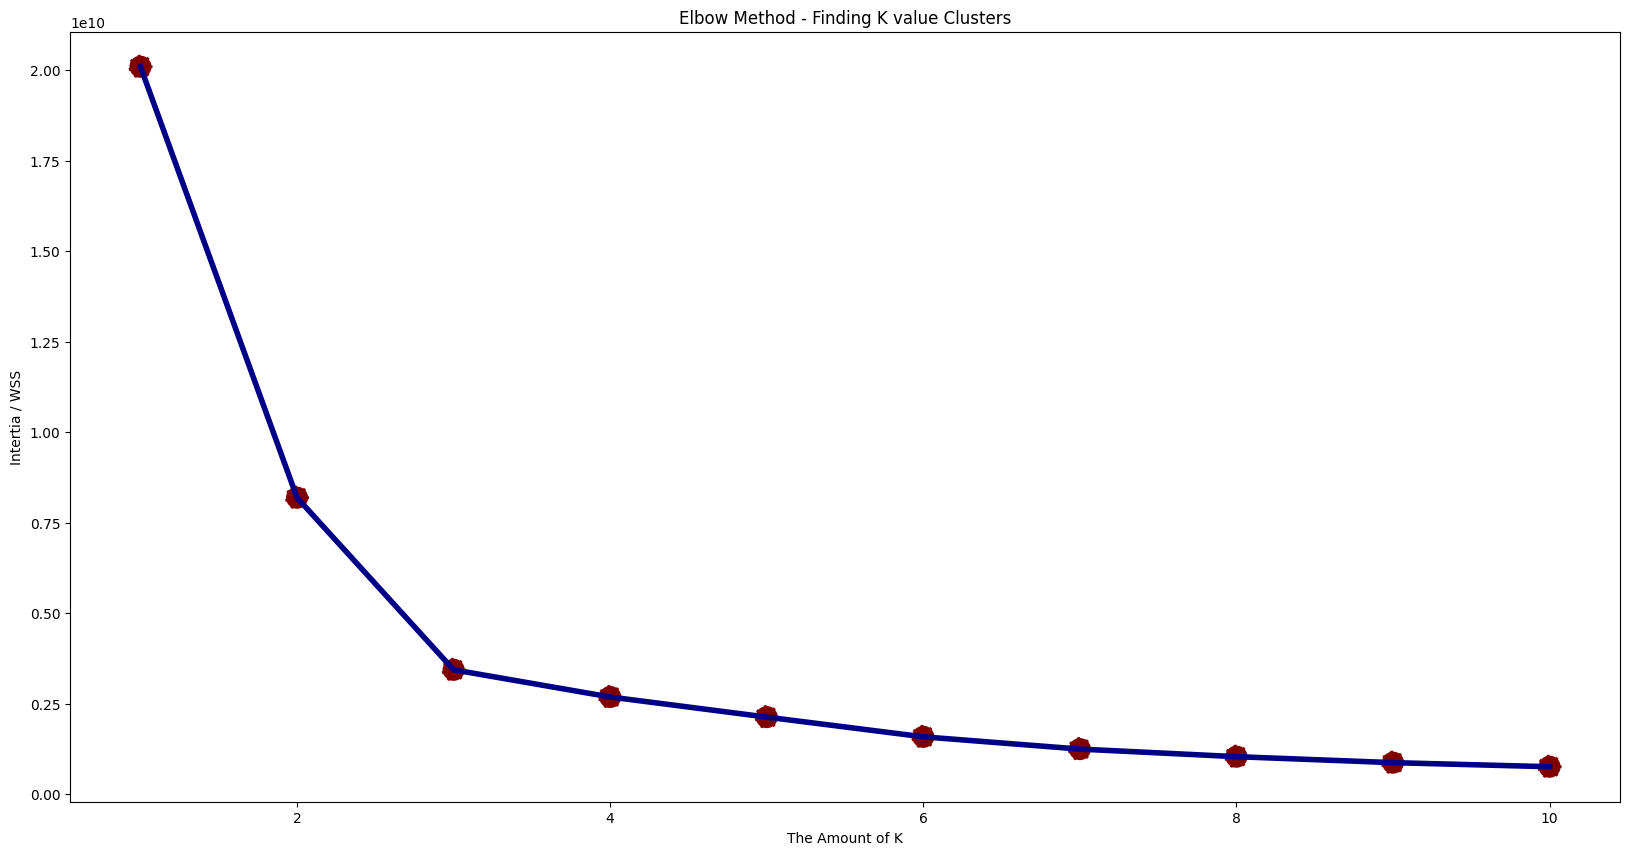

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(feature.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

In [ ]:
# Inisialisasi objek kmeans dengan n cluster = 3 (sesuai dengan hasil Elbow Method)
kmeans_elbow = KMeans(n_clusters=3)
kmeans_elbow.fit(feature)

KMeans(n_clusters=3)

In [ ]:
# Tambahkan label klaster ke DataFrame
feature['cluster_elbow'] = kmeans_elbow.labels_
feature.head()

,ffp_tier,age,last_to_end,avg_discount,point_notflight,recency,frequency,exchange_ratio,monetary,interval_ratio,work_city,work_province,work_country,gender_Male,rank_elbow,rank_silhouette,cluster_silhouette,cluster_elbow
0,2.0,-0.769231,-0.449730,1.274540,50.0,-0.447340,8.785276,0.161905,45.284318,1.043850,5,810,21,1,3,4,2,2
2,2.0,-0.076923,-0.406486,2.767231,26.0,-0.403909,4.202630,0.148148,31.233204,0.254597,5,810,21,1,3,4,2,2
3,1.0,1.769231,-0.034595,1.932824,12.0,-0.034745,0.326292,0.478261,22.835334,-0.091918,763,96,92,1,3,5,3,2
4,2.0,0.538462,-0.432432,1.320481,39.0,-0.429967,6.602996,0.177632,24.133688,3.116158,1847,890,21,1,1,1,0,0
5,2.0,1.769231,-0.112432,1.305376,15.0,-0.112921,4.187779,0.108696,17.749177,2.031145,1820,872,21,1,1,1,0,0


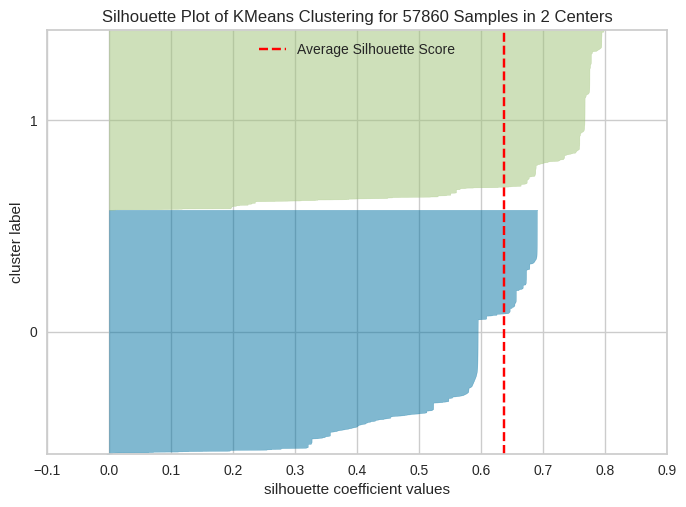

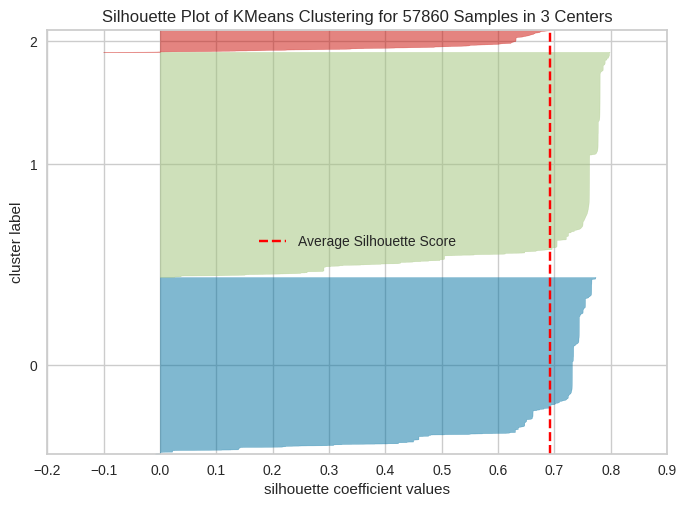

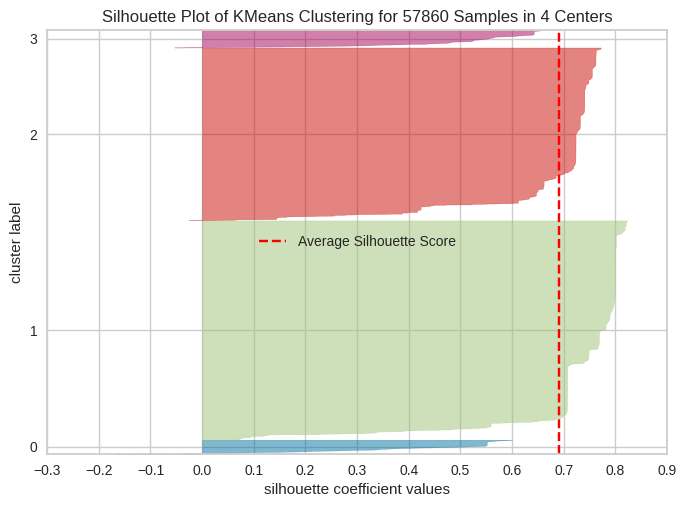

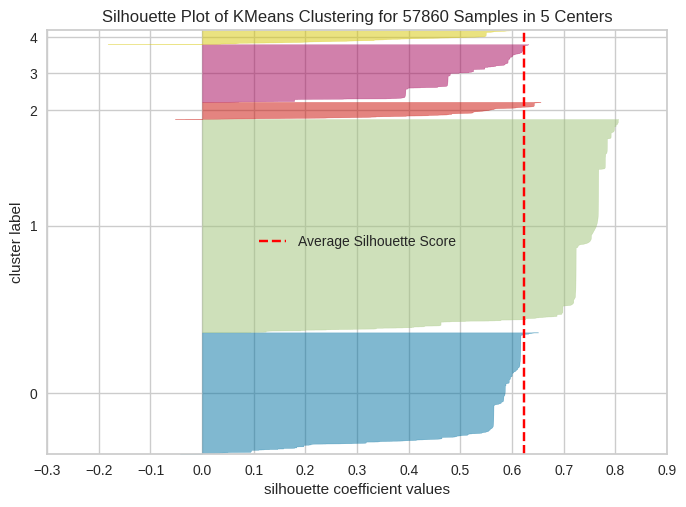

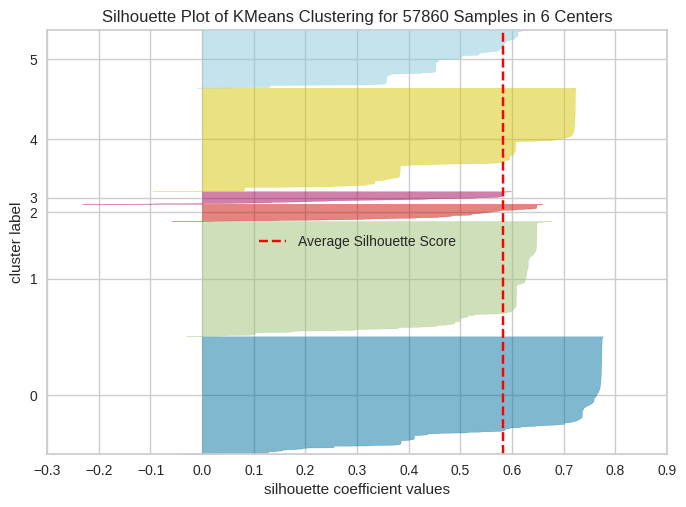

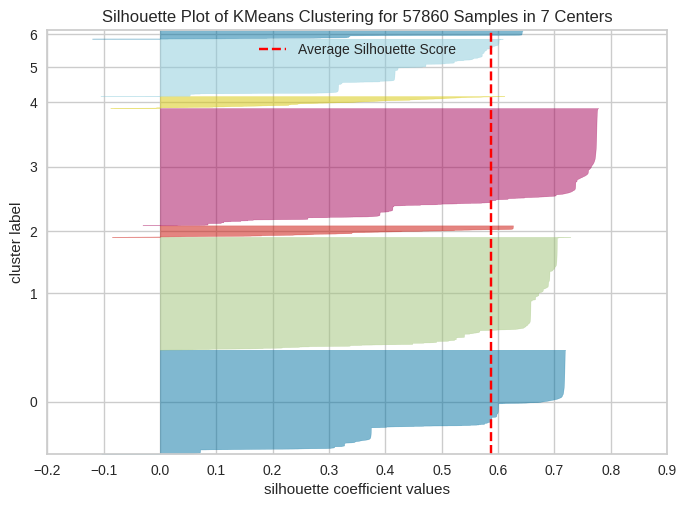

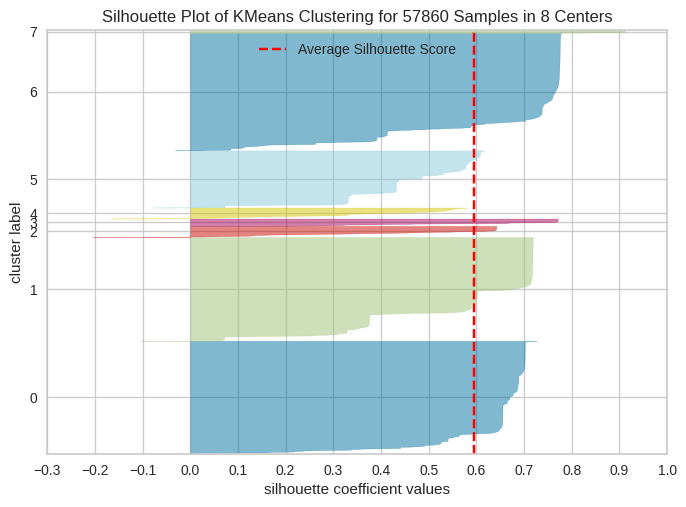

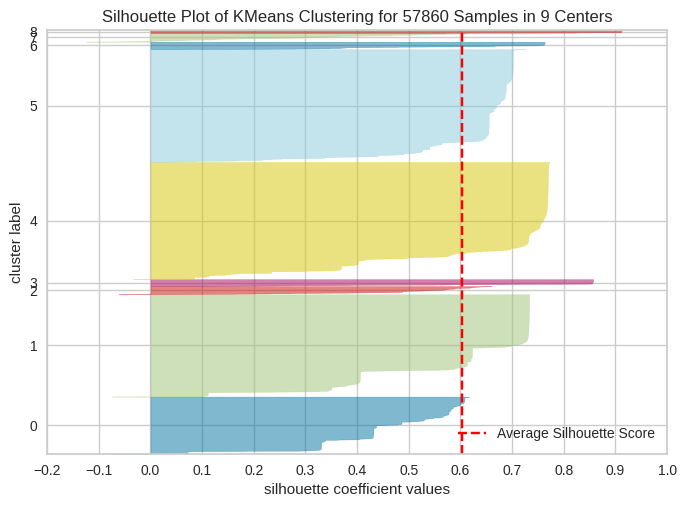

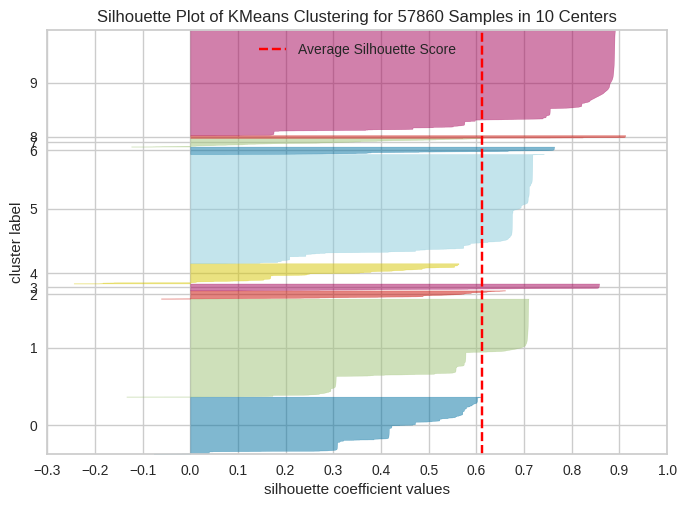

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Menginisialisasi list untuk menyimpan nilai silhouette
silhouette_scores = []

for k in range(2, 11):  # Start from k=2 (kalo 1 bakal error)
    # Create KMeans instance for different number of clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)

    # Visualize silhouette score
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(feature)
    visualizer.show()

    # Menghitung rata-rata silhouette score
    silhouette_scores.append(visualizer.silhouette_score_)

In [ ]:
# Mengambil model KMeans dengan jumlah klaster 6
kmeans_silhouette = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans_silhouette.fit(feature)

# Tambahkan label klaster ke DataFrame
feature['cluster_silhouette'] = kmeans_silhouette.labels_
feature.head()

,ffp_tier,age,last_to_end,avg_discount,point_notflight,recency,frequency,exchange_ratio,monetary,interval_ratio,work_city,work_province,work_country,gender_Male,rank_elbow,rank_silhouette,cluster_silhouette
0,2.0,-0.769231,-0.449730,1.274540,50.0,-0.447340,8.785276,0.161905,45.284318,1.043850,5,810,21,1,3,4,2
2,2.0,-0.076923,-0.406486,2.767231,26.0,-0.403909,4.202630,0.148148,31.233204,0.254597,5,810,21,1,3,4,2
3,1.0,1.769231,-0.034595,1.932824,12.0,-0.034745,0.326292,0.478261,22.835334,-0.091918,763,96,92,1,3,5,3
4,2.0,0.538462,-0.432432,1.320481,39.0,-0.429967,6.602996,0.177632,24.133688,3.116158,1847,890,21,1,1,1,0
5,2.0,1.769231,-0.112432,1.305376,15.0,-0.112921,4.187779,0.108696,17.749177,2.031145,1820,872,21,1,1,1,0


In [ ]:
feature['cluster_elbow'].value_counts()

,count
cluster_elbow,
0,31046
1,23872
2,2942


In [ ]:
feature['cluster_silhouette'].value_counts()

,count
cluster_silhouette,
0,16046
1,15761
4,14158
5,7845
2,2349
3,1701


In [ ]:
# Hitung banyaknya data per cluster
counts_elbow = feature['cluster_elbow'].value_counts().sort_index()
counts_silhouette = feature['cluster_silhouette'].value_counts().sort_index()

# Ranking untuk cluster_elbow
rank_elbow = counts_elbow.rank(ascending=False, method='dense').astype(int)
# Ranking untuk cluster_silhouette
rank_silhouette = counts_silhouette.rank(ascending=False, method='dense').astype(int)

feature['rank_elbow'] = feature['cluster_elbow'].map(rank_elbow)
feature['rank_silhouette'] = feature['cluster_silhouette'].map(rank_silhouette)


In [ ]:
feature.drop(['cluster_elbow','cluster_silhouette'], axis=1, inplace=True)

In [ ]:
feature.columns

Index(['ffp_tier', 'age', 'last_to_end', 'avg_discount', 'point_notflight',
       'recency', 'frequency', 'exchange_ratio', 'monetary', 'interval_ratio',
       'work_city', 'work_province', 'work_country', 'gender_Male',
       'rank_elbow', 'rank_silhouette'],
      dtype='object')

In [ ]:
gr_elbow_mean = feature.groupby('rank_elbow')[num].mean().reset_index()
gr_elbow_std = feature.groupby('rank_elbow')[num].std().reset_index()

In [ ]:
feature.groupby('rank_elbow')[['gender_Male','work_city','work_province','work_country']] \
       .agg(lambda x: x.mode()[0])


,gender_Male,work_city,work_province,work_country
rank_elbow,,,,
1,1,1820,872,21
2,1,2409,872,21
3,1,5,810,21


In [ ]:
gr_elbow_mean

,rank_elbow,ffp_tier,age,last_to_end,avg_discount,point_notflight,recency,frequency,exchange_ratio,monetary,interval_ratio
0,1,0.109161,0.069775,0.268665,0.047805,3.414417,0.271032,0.469637,0.020773,0.564300,0.169041
1,2,0.088639,0.083870,0.291052,0.002539,2.259258,0.293471,0.405999,0.017516,0.348781,0.104279
2,3,0.187288,0.448857,0.518807,0.396293,1.091434,0.521993,0.484269,0.015026,0.890647,0.047127


In [ ]:
gr_elbow_std

,rank_elbow,ffp_tier,age,last_to_end,avg_discount,point_notflight,recency,frequency,exchange_ratio,monetary,interval_ratio
0,1,0.380938,0.754565,0.769887,0.936031,8.364571,0.772193,1.684882,0.094019,1.518972,0.862259
1,2,0.348575,0.718070,0.777710,0.901992,6.512513,0.780067,2.108364,0.076273,1.277527,0.810573
2,3,0.535641,0.876486,0.896364,1.131949,3.730299,0.899306,3.125960,0.074745,2.336967,0.855113


In [ ]:
gr_silhouette_mean = feature.groupby('rank_silhouette')[num].mean().reset_index()
gr_silhouette_std = feature.groupby('rank_silhouette')[num].std().reset_index()

In [ ]:
feature.groupby('rank_silhouette')[['gender_Male','work_city','work_province','work_country']] \
       .agg(lambda x: x.mode()[0])

,gender_Male,work_city,work_province,work_country
rank_silhouette,,,,
1,1,1820,872,21
2,1,2409,872,21
3,1,1557,810,21
4,1,2643,1079,21
5,1,5,810,21
6,1,1557,6,21


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
categories = gr_elbow_mean.columns.to_list()
categories += categories[:1]
cols = 2
rows = 2
col_rows = [(x, y) for x in range(rows) for y in range(cols)]

fig = make_subplots(rows=rows, cols=cols,
                    specs=[[{'type': 'polar'}]*cols]*rows,
                    subplot_titles=[f'Cluster Rank {x+1}' for x in range(len(gr_elbow_mean))],
                   )

for i, item in enumerate(col_rows):
    if i >= len(gr_elbow_mean):  # biar fleksibel sesuai jumlah cluster
        continue
    row = item[0] + 1
    col = item[1] + 1

    values = gr_elbow_mean.iloc[i].to_list()
    errors = gr_elbow_std.iloc[i].to_list()

    values += values[:1]
    errors += errors[:1]

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        mode='lines+markers+text',
        fill='toself',
        textposition="top center",
        textfont=dict(size=8),
        showlegend=False,
        customdata=errors,
        hovertemplate='<br>'.join([
            'Category: %{theta}',
            'Values: %{r:.2f} ± %{customdata:.2f}'
        ]),
        name=f'Cluster {i}'
    ),row = row, col = col)

    # error range (± std)
    upper_bound = np.array(values) + np.array(errors)
    lower_bound = np.array(values) - np.array(errors)
    ranges = np.append(upper_bound,lower_bound[::-1])
    fig.add_trace(go.Scatterpolar(
        r=ranges,
        theta=categories + categories[::-1],
        fill='toself',
        fillcolor='rgba(120, 120, 255, 0.25)',
        line_color='rgba(255,255,255,0)',
        showlegend=False,
        hoverinfo='skip',
        name='Stdev'
    ),row = row, col = col)

fig.layout.dragmode = 'pan'
fig.update_layout(
    autosize=True,
    height=1400,
)
fig.update_polars(radialaxis=dict(range=[0, 10], angle = 90, tickangle=90))
fig.update_annotations(yshift=20)
fig.show()

Berdasarkan Cluster Hasil Evaluasi Elbow Method:
- Cluster 1:
  - `point_notflight` tinggi
    > Customer ini mendapatkan poin bukan dari penerbangan
  - `recency` rendah
    > baru-baru ini aktif
  - `frequency` dan `monetary` rendah
  - Interpretasi:
    > Customer aktif, tapi lebih banyak menggunakan layanan non-flight

- Cluster 2:
  - Lebih tinggi `monetary` cluster 2 dibandingkan sebelumnya
  - `recency` relatif rendah -> baru aktif
  - `frequency` sedikit lebih baik dari cluster lain.
  - Interpretasi:
    > Mereka mulai aktif dalam penerbangan, memberikan kontribusi lebih tinggi terhadap revenue. Perlu dipertahankan dan ditingkatkan loyalitasnya

- Cluster 3:
  - Hampir semua fitur rendah
  - `recency` tinggi -> sudah lama tidak aktif
  - `frequency` dan `monetary` sangat kecil
  - Interpretasi:
    > Cluster dormant/inactive group, sehingga perlu program reaktivasi.


In [ ]:
categories = gr_silhouette_mean.columns.to_list()
categories += categories[:1]
cols = 3
rows = 2
col_rows = [(x, y) for x in range(rows) for y in range(cols)]

fig = make_subplots(rows=rows, cols=cols,
                    specs=[[{'type': 'polar'}]*cols]*rows,
                    subplot_titles=[f'Cluster Rank {x+1}' for x in range(len(gr_silhouette_mean))],
                   )

for i, item in enumerate(col_rows):
    if i >= len(gr_silhouette_mean):  # biar fleksibel sesuai jumlah cluster
        continue
    row = item[0] + 1
    col = item[1] + 1

    values = gr_silhouette_mean.iloc[i].to_list()
    errors = gr_silhouette_std.iloc[i].to_list()

    values += values[:1]
    errors += errors[:1]

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        mode='lines+markers+text',
        fill='toself',
        textposition="top center",
        textfont=dict(size=8),
        showlegend=False,
        customdata=errors,
        hovertemplate='<br>'.join([
            'Category: %{theta}',
            'Values: %{r:.2f} ± %{customdata:.2f}'
        ]),
        name=f'Cluster {i}'
    ),row = row, col = col)

    # error range (± std)
    upper_bound = np.array(values) + np.array(errors)
    lower_bound = np.array(values) - np.array(errors)
    ranges = np.append(upper_bound,lower_bound[::-1])
    fig.add_trace(go.Scatterpolar(
        r=ranges,
        theta=categories + categories[::-1],
        fill='toself',
        fillcolor='rgba(120, 120, 255, 0.25)',
        line_color='rgba(255,255,255,0)',
        showlegend=False,
        hoverinfo='skip',
        name='Stdev'
    ),row = row, col = col)

fig.layout.dragmode = 'pan'
fig.update_layout(
    autosize=True,
    height=1400,
)
fig.update_polars(radialaxis=dict(range=[0, 10], angle = 90, tickangle=90))
fig.update_annotations(yshift=20)
fig.show()

Interpretasi dengan Evaluasi Cluster Silhouette:
- Cluster Rank 1 (Mayoritas, anggota terbanyak)
  - Karakteristik:
    - Banyak punya `point_notflight` (point dari non-penerbangan).
    - `recency` relatif rendah → artinya mereka cukup **baru atau masih aktif**.
    - Frekuensi & monetary tidak terlalu tinggi
  - Rekomendasi:
    - Jaga retensi dengan program **loyalty sederhana** (diskon, promo bundling).
    - Edukasi agar lebih banyak menggunakan poin untuk penerbangan, bukan hanya non-flight.
- Cluster Rank 2 (Segmen besar, tapi lebih spesifik)
  - Karakteristik:
    - Masih banyak `point_notflight`, tapi juga terlihat sedikit peningkatan di `monetary`.
    - Recency lumayan baik, aktif.
  - Rekomendasi:
    - Dorong segmen ini untuk **naik ke tier lebih tinggi** dengan campaign seperti “bonus miles jika upgrade ke flight usage”.
    - Cocok jadi target untuk **cross-selling** (hotel, travel insurance, dsb).

- Cluster Rank 3 (Segmen menengah)
  - Karakteristik:
    - `rank_silhouette` lebih tinggi (anggotanya lebih sedikit dari 1 & 2).
    - Mulai ada perbedaan pola penggunaan poin.
  - Rekomendasi:
    - Gunakan pendekatan **personalized offer**.
    - Potensial untuk dijadikan **growth segment** (naikkan intensitas penggunaan).
- Cluster Rank 4 (Segmen kecil, tapi mulai spesialis)
  - Karakteristik:
    - Ada kombinasi `monetary` dan `exchange_ratio` yang sedikit lebih menonjol.
    - Bisa jadi kelompok dengan **tingkat spending lebih tinggi**, meski jumlahnya kecil.
  - Rekomendasi:
    - Tawarkan **program eksklusif** (akses lounge, special voucher).
    - Jaga engagement agar tidak churn → karena mereka punya value besar per individu.
- Cluster Rank 5 (Segmen sangat kecil)
  - Karakteristik:
    - Jumlah anggota sangat sedikit.
    - `monetary` atau `recency` bisa sangat ekstrem (misal: pelanggan lama tapi jarang aktif, atau sebaliknya).
  - Rekomendasi:
    - Jika mereka **VIP** → berikan treatment khusus (priority support, exclusive deals).
    - Jika mereka **low activity** → lakukan **churn prevention** (email reminder, win-back promo).

- Cluster Rank 6 (Segmen terkecil, paling unik)
  - Karakteristik:
    - Anggota paling sedikit.
    - Bisa jadi outlier: pelanggan dengan perilaku yang **sangat berbeda** (misalnya heavy spender sekali, lalu tidak aktif).
  - Rekomendasi:
    - Jika high-value → **dipertahankan dengan high-touch strategy**.
    - Jika low-value/outlier → **tidak perlu fokus besar**, cukup monitor.